___

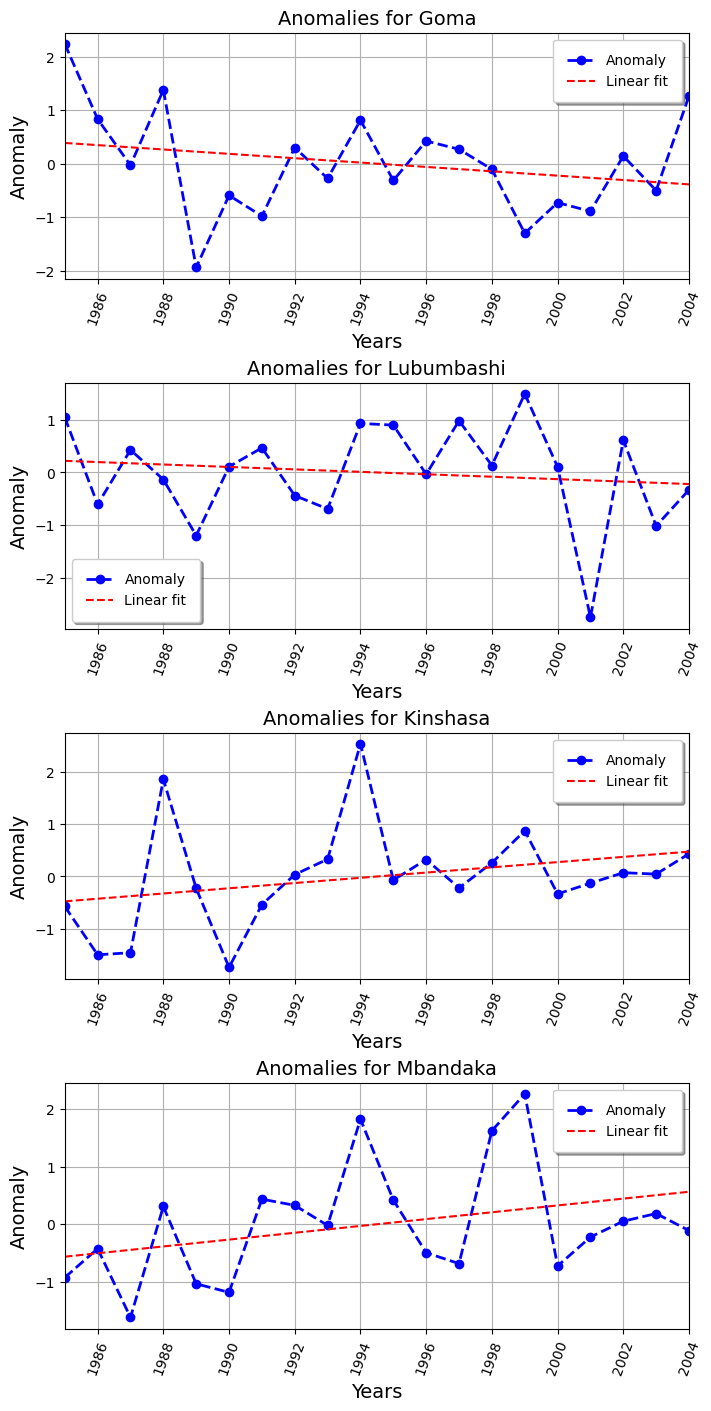

In [2]:
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from matplotlib.ticker import MaxNLocator

list_stations = {'Goma': [29.22,1.6585],   # Name : [Lat,Lon]
                 
                 'Lubumbashi': [27.5,11.68],
                 
                 'Kinshasa': [15.266,-4.4419],
                 
                 'Mbandaka': [18.297,0.0266] }


years=range(1985,2005) # From the Data description

Len_list = len(list_stations)

dsG = []

dslocG = []

fig, axs = plt.subplots(Len_list ,layout="constrained",figsize=(7,14))


for i in range(Len_list):
    key_list  = list(list_stations.keys())
    
    
    dsG_temp = xr.open_dataset(f'chirps_yearmean_std_remapbil_{key_list[i]}.nc')  # NetCDF or OPeNDAP URL
    dsG.append(dsG_temp)

    # Extract a dataset closest to specified point
    
    values_list = list(list_stations.values())
    
    Lat_i = values_list[i][0]
    Lon_i = values_list[i][1]
    dslocG.append(dsG[i].sel(lon=Lon_i, lat=Lat_i, method='nearest'))

    # Select a variable to plot

    axs[i].plot(years, dslocG[i]['precip'], marker = 'o', color = 'blue',label='Anomaly',linestyle='dashed',linewidth=2)
    slopeG, interceptG = np.polyfit(years, dslocG[i]['precip'], 1)
    axs[i].set_xlabel('Years', fontsize=14)
    axs[i].set_ylabel('Anomaly', fontsize=14)

    axs[i].set_title(f'Anomalies for {key_list[i]}',fontsize=14)

    axs[i].set_xlim(years[0],years[-1])
    axs[i].tick_params(axis='x', rotation=70)

    slope, intercept = np.polyfit(years, dslocG[i]['precip'], 1)
    trend = intercept + (slope * years)
      
    axs[i].plot(years, trend, color='red', label='Linear fit', linestyle='--')
    axs[i].legend(loc='lower left')

    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
    axs[i].legend(fancybox=True, framealpha=1, shadow=True ,borderpad=1, ncol=1)
    axs[i].grid()

# plt.show()

___